<a href="https://colab.research.google.com/github/unusualpineapple/New-Visualization-/blob/main/FoodSalesPrep01232022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

sales = '/content/sales_predictions.csv'
df = pd.read_csv (sales)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().any() 

False

In [ ]:
df.isna().sum()
df[df.isna().any(axis = 1)]
#Decided to leave the data because it will be deleting almost half of the data.  Suggest to consult with a specialist to see what matters.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
#Taking the mean of the item weight and replacing all the Nan with the average
#df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)
#df.drop(columns = ['Outlet_Size'], inplace = True)
#df
#Dropped out the outlet size becuase there was too much missing data and it didnt seem relevant to what was being shown
#Then averaged the weight of the items to fill in the missing data to keep that row

In [ ]:
df.isna().sum()
#Confirming not missing any other data in the set besides the dropped column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Replacing any Syntax Errors
#Replacing for Item type
df.replace(['reg'], ['Regular'], inplace = True)
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)
df['Item_Fat_Content'].value_counts()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.agg(
    {
        "Item_Weight": ["min", "max", "mean"],
        "Item_Visibility": ["min", "max", "mean"],
        "Item_MRP": ["min", "max", "mean"],
        "Outlet_Establishment_Year": ["min", "max", "mean"],
        "Item_Outlet_Sales": ["min", "max", "mean"],
       
    }
)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


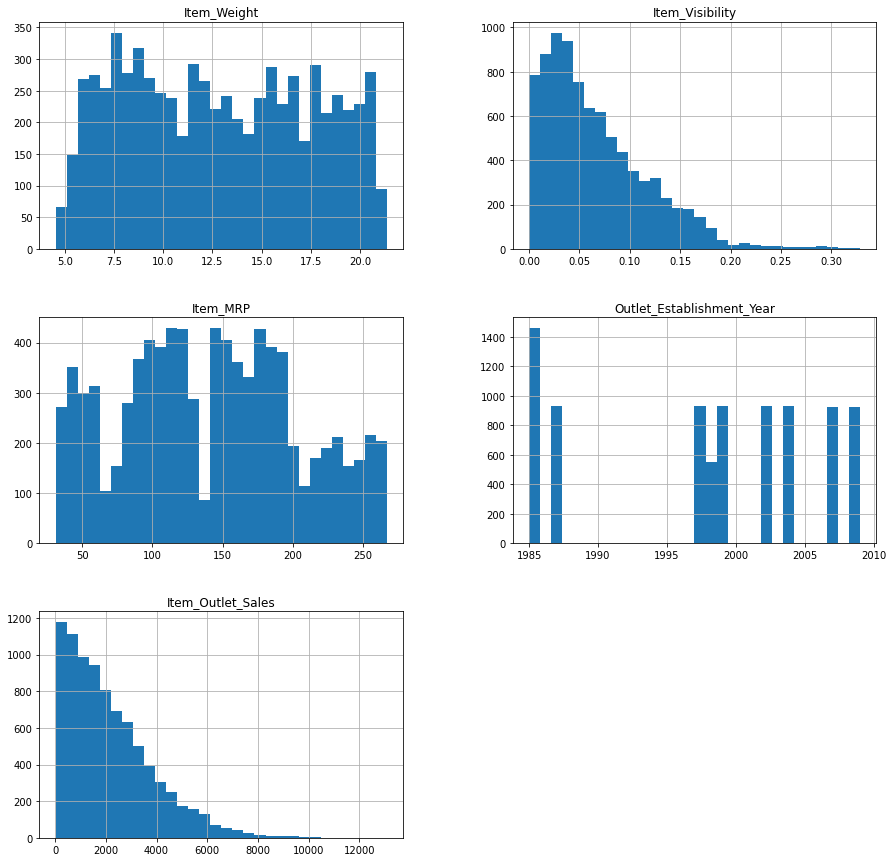

In [ ]:
df.hist(bins = 30, figsize = (15,15))
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset = False, style = 'plain');

#we can the Item Wieght has a few members that are off the chart because I avg the weight to input it in the system
# Item Visibility has a negative correlation 
#Item MRP has no correlation
# outlet establishment also has no correlation
#Item outlet sales has a negative correlation from how expesive the items are

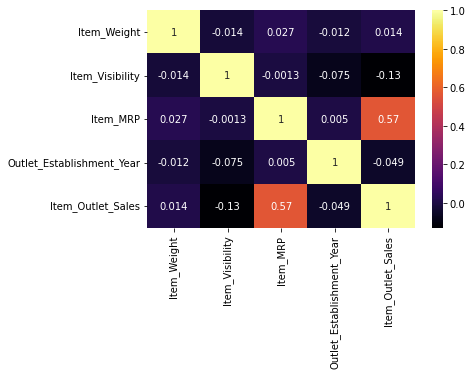

In [ ]:
foodcorr = df.corr()
sns.heatmap(foodcorr,cmap = 'inferno', annot = True);

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


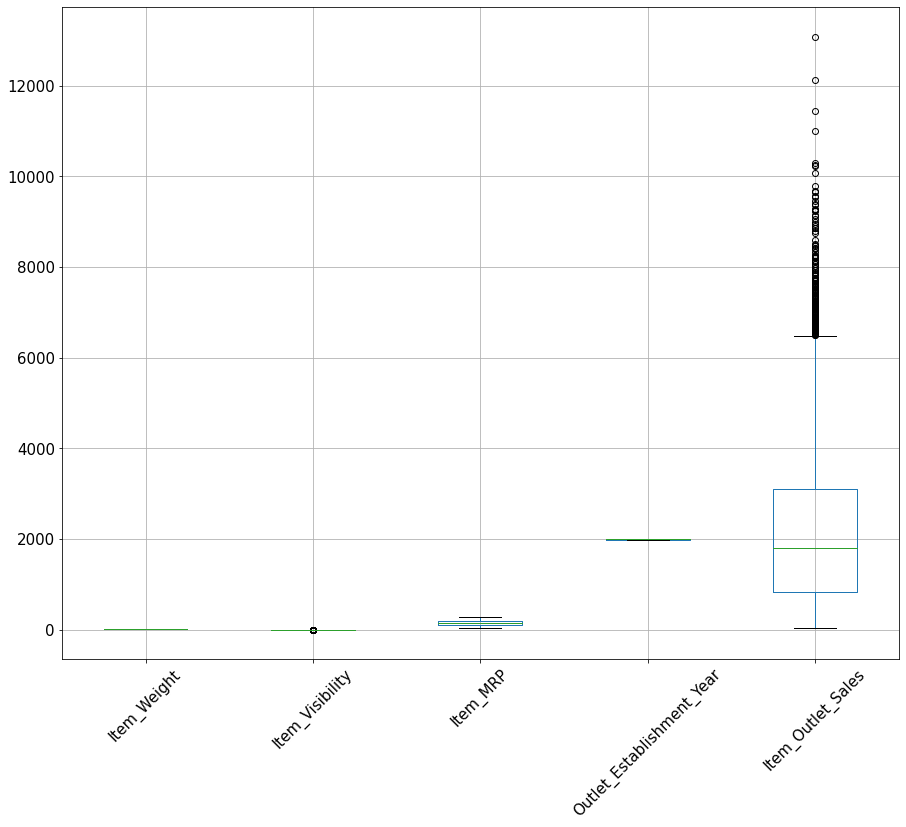

In [ ]:
df.boxplot(figsize = (15,12), 
           fontsize = 15)
plt. xticks (rotation = 45, fontsize = 15);

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

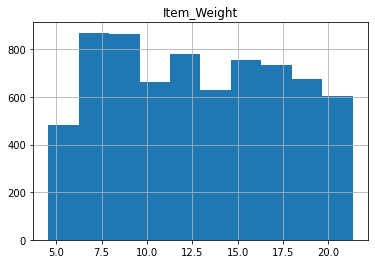

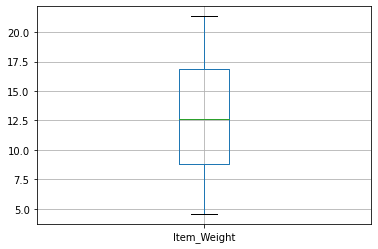

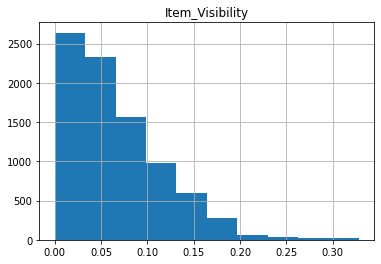

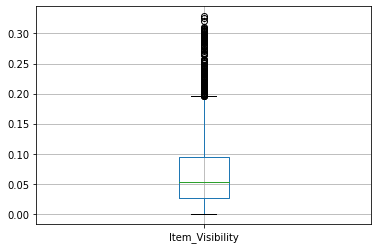

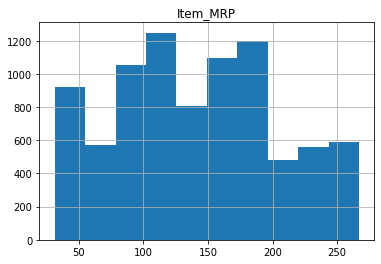

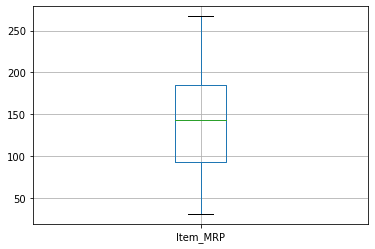

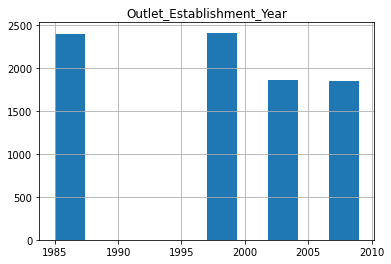

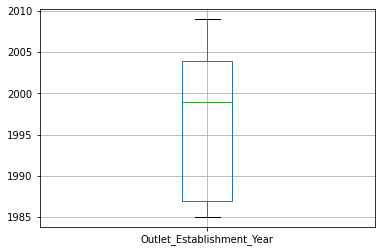

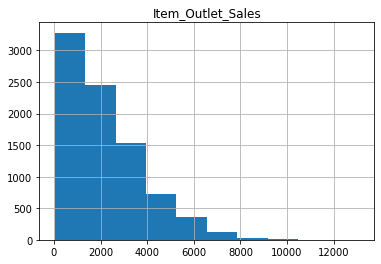

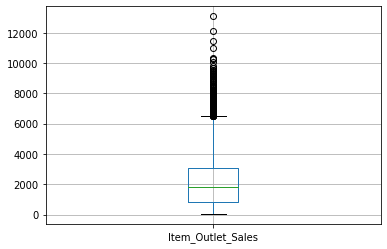

In [ ]:
for col in num_cols:
  df.hist(column = col)
  plt.show()
  df.boxplot(column = col)
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
Establish_year = df['Outlet_Establishment_Year']
Weight = df['Item_Weight']
Out_Size = df['Outlet_Size']
Item_type = df['Item_Type']

In [ ]:
Estab_Weight = df.groupby('Outlet_Establishment_Year')['Item_Weight'].mean()

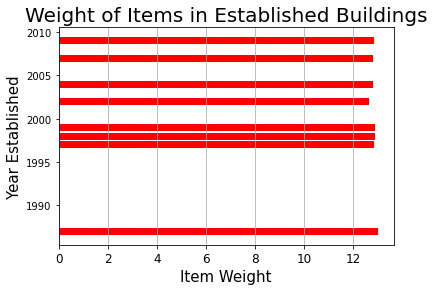

In [ ]:
plt.barh(Estab_Weight.index,Estab_Weight.values, color='red')
bar_width=0.15
plt.xlabel('Item Weight', fontsize=15)
plt.ylabel('Year Established', fontsize=15)
plt.title('Weight of Items in Established Buildings', fontsize=20)
plt.xticks(rotation=0,fontsize=12);
plt.grid(axis='x')


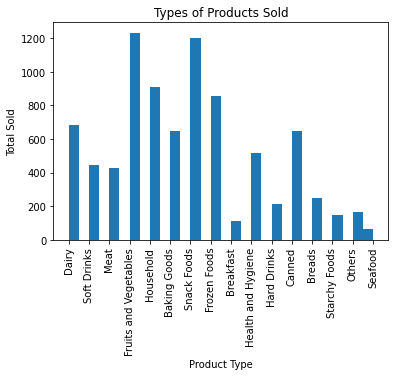

In [ ]:
plt.xticks(rotation=90)
plt.hist(Item_type, bins = 30)
plt.xlabel('Product Type')
plt.ylabel('Total Sold')
plt.title('Types of Products Sold')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Estab_Sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

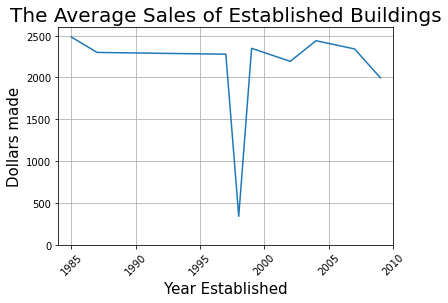

In [ ]:
plt.plot(Estab_Sales.index,Estab_Sales)
plt.xlim(1984,2010)
plt.ylim(0,2600)
plt.xlabel('Year Established',fontsize=15)
plt.ylabel('Dollars made',fontsize=15)
plt.title('The Average Sales of Established Buildings',Fontsize=20)
plt.ticklabel_format(useOffset=False)
plt.grid(linestyle='-')
plt.xticks(rotation=45,);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [ ]:
X=df.drop(columns=['Outlet_Establishment_Year'])
y=df['Outlet_Establishment_Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')

In [ ]:
mean_imp = SimpleImputer(strategy= 'mean')
freq_imp = SimpleImputer(strategy = 'most_frequent')

mean_imp.fit(X_train[['Item_Weight']])
X_train['Item_Weight'] = mean_imp.transform(X_train[['Item_Weight']])
X_test['Item_Weight'] = mean_imp.transform(X_test[['Item_Weight']])


freq_imp.fit(X_train[['Item_Visibility']])
X_train['Item_Visibility'] = freq_imp.transform(X_train[['Item_Visibility']])
X_test['Item_Visibility'] = freq_imp.transform(X_test[['Item_Visibility']])

In [ ]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
num_pipe = make_pipeline(mean_imp, scaler)
cat_pipe = make_pipeline(freq_imp, encoder)

In [ ]:
num_tuple = (scaler, num_selector)
cat_tuple = (encoder, cat_selector)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_encoder.fit(X_train)
cat_ohe = ohe_encoder.transform(X_train)

In [ ]:
col_trans = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [ ]:
lin_reg = LinearRegression()

In [ ]:
pipe = make_pipeline(col_trans, lin_reg)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee2b88bf90>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee2b88b110>)])),
                ('linearregression', LinearRegression())])

In [ ]:
pipe.score(X_train, y_train)

1.0

In [ ]:
pipe.score(X_test, y_test)

0.9999999066300945

This is the Linear Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error

training_pred = pipe.predict(X_train)
training_mae = mean_absolute_error(y_train, training_pred)
training_mae

1.8141516657704687e-14

In [ ]:
testing_pred = pipe.predict(X_test)
testing_mae = mean_absolute_error(y_test, testing_pred)
testing_mae

0.0001091268721635681

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
training_mse = mean_squared_error(y_train, training_pred)
training_mse

4.1249033205769334e-27

In [ ]:
testing_mse = mean_squared_error(y_test, testing_pred)
testing_mse

6.446822229404821e-06

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
training_msr = mean_squared_error(y_train, training_pred)
training_msr

4.1249033205769334e-27

In [ ]:
testing_msr = mean_squared_error(y_test, testing_pred)
testing_msr

6.446822229404821e-06

Regression Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree_pipe = make_pipeline (col_trans, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee2b88bf90>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fee2b88b110>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
train_pred_tree = dec_tree_pipe.predict(X_train)
test_pred_tree = dec_tree_pipe.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE {rmse}')

In [ ]:
evaluate_model(y_train, pipe.predict(X_train))

MAE 1.8141516657704687e-14
 MSE 4.1249033205769334e-27
 R^2 1.0
 RMSE 6.422541024062776e-14


In [ ]:
evaluate_model(y_test, pipe.predict(X_test))

MAE 0.0001091268721635681
 MSE 6.446822229404821e-06
 R^2 0.9999999066300945
 RMSE 0.0025390593197884962


In [ ]:
evaluate_model(y_train, dec_tree_pipe.predict(X_train))

MAE 0.0
 MSE 0.0
 R^2 1.0
 RMSE 0.0


In [ ]:
evaluate_model(y_test, dec_tree_pipe.predict(X_test))

MAE 0.0
 MSE 0.0
 R^2 1.0
 RMSE 0.0
